In [1]:
import re
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


In [2]:
#import file tweets. csv

filename = 'C:/Users/karen/Downloads/UIC/IDS-566-master/assignment2/Tweets.csv'
with open(filename,'rb') as f:
    reader = unicodecsv.DictReader(f)
    tweets = list(reader)
 

In [3]:
#preview data
tweets[0]

OrderedDict([('tweet_id', '570306133677760513'),
             ('airline_sentiment', 'neutral'),
             ('airline_sentiment_confidence', '1.0'),
             ('negativereason', ''),
             ('negativereason_confidence', ''),
             ('airline', 'Virgin America'),
             ('airline_sentiment_gold', ''),
             ('name', 'cairdin'),
             ('negativereason_gold', ''),
             ('retweet_count', '0'),
             ('text', '@VirginAmerica What @dhepburn said.'),
             ('tweet_coord', ''),
             ('tweet_created', '2015-02-24 11:35:52 -0800'),
             ('tweet_location', ''),
             ('user_timezone', 'Eastern Time (US & Canada)')])

## Extract required fields

In [4]:
def extract_field(key):
    '''key must be a key from tweets, in string type'''
    extract = []
    for line in tweets:
        extract.append(line[key])
    return np.array(extract)


In [5]:
airline_sentiment = extract_field('airline_sentiment')
airline = extract_field('airline')
text = extract_field('text')

Tweets = pd.DataFrame(tweets)

## Plot Sentiment distribution for each airline 

In [6]:
# sentiment distribution for each airline

sentiment = pd.DataFrame(airline,columns=['airline_company'])
sentiment['sentiment'] = airline_sentiment
sentiment.head(20)



,airline_company,sentiment
0,Virgin America,neutral
1,Virgin America,positive
2,Virgin America,neutral
3,Virgin America,negative
4,Virgin America,negative
5,Virgin America,negative
6,Virgin America,positive
7,Virgin America,neutral
8,Virgin America,positive
9,Virgin America,positive


visualize the distribution for each airline company

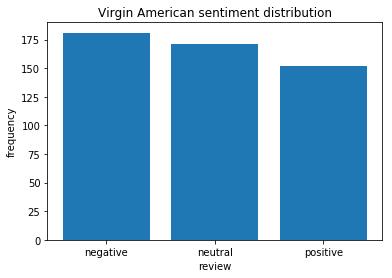

In [7]:
#virgin american
VA = sentiment[sentiment.airline_company=='Virgin America']
counter = Counter(VA['sentiment'])

review = list(counter.keys())
frequency = counter.values()
plt.bar(review,frequency,align='center')
plt.title('Virgin American sentiment distribution')
plt.xlabel('review')
plt.ylabel('frequency')
plt.show()


Conclusion : Virgin America has almost even distribution to 3 types of review, however, the total sample in the data set is too small compared to the other airlines.

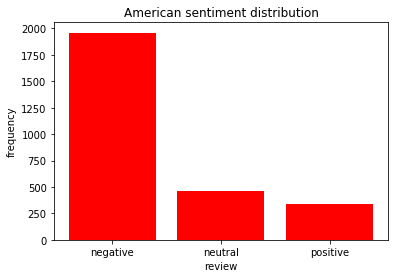

In [8]:
#American Airline
AA = sentiment[sentiment.airline_company=='American']
counter = Counter(AA['sentiment'])

review = list(counter.keys())
frequency = counter.values()
plt.bar(review,frequency,align='center',color='red')
plt.title('American sentiment distribution')
plt.xlabel('review')
plt.ylabel('frequency')
plt.show()


conclusion:American airline is more "negative" in the review from most of the tweets. Most of the reviews from the tweets are negative

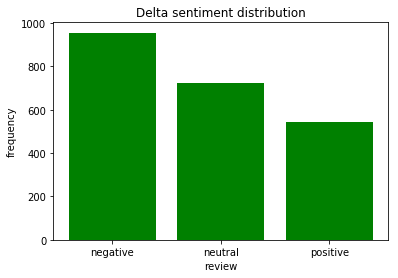

In [9]:
#Delta
DT = sentiment[sentiment.airline_company=='Delta']
counter = Counter(DT['sentiment'])

review = list(counter.keys())
frequency = counter.values()
plt.bar(review,frequency,align='center',color='green')
plt.title('Delta sentiment distribution')
plt.xlabel('review')
plt.ylabel('frequency')
plt.show()


Conclusion: Most of the reviews are negatvie in the case of Delta airline while it has least number of review with "positive"

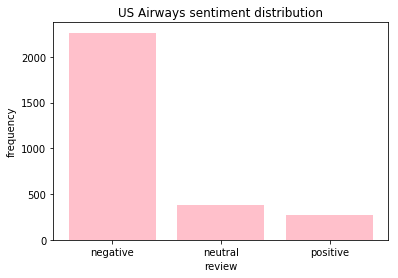

In [10]:
#US Airways
UA = sentiment[sentiment.airline_company=='US Airways']
counter = Counter(UA['sentiment'])

review = list(counter.keys())
frequency = counter.values()
plt.bar(review,frequency,align='center',color='pink')
plt.title('US Airways sentiment distribution')
plt.xlabel('review')
plt.ylabel('frequency')
plt.show()


Conclusion : Most of the review on US airways are negative

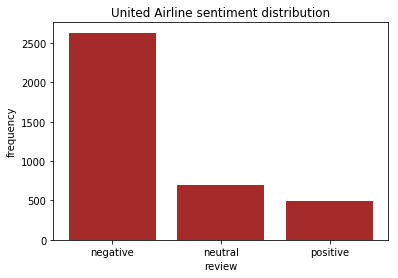

In [11]:
#United
UN = sentiment[sentiment.airline_company=='United']
counter = Counter(UN['sentiment'])

review = list(counter.keys())
frequency = counter.values()
plt.bar(review,frequency,align='center',color='brown')
plt.title('United Airline sentiment distribution')
plt.xlabel('review')
plt.ylabel('frequency')
plt.show()


Conlusion: United Airline has more negative review, with positive review the least level

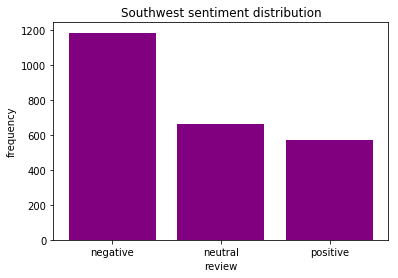

In [12]:
#Southwest

SW = sentiment[sentiment.airline_company=='Southwest']
counter = Counter(SW['sentiment'])

review = list(counter.keys())
frequency = counter.values()
plt.bar(review,frequency,align='center',color='purple')
plt.title('Southwest sentiment distribution')
plt.xlabel('review')
plt.ylabel('frequency')
plt.show()


Conclusion : Although there are more negative reviews on Southwest Airline, positive reviews and neutral are only slightly lower

## Remove URL and mentions and rename hashtag sign to 'hashtag_', Vectorize tweets using count vectorizer



In [14]:
data = pd.DataFrame(airline,columns=['company'])
data['sentiment'] = airline_sentiment


regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

final_tweet = []
for line in text:
    #Changing URLs to 'url'
    line = pattern_url.sub('url', line.lower())

    #Chaning hashtag sign (#) to 'hashtag_'
    line = pattern_hashtag.sub(r'hashtag_\1', line)

    #Removing mentions
    line = pattern_mention.sub('', line)

    final_tweet.append(line)
#preview
#final_tweet[:10]
#append that onto the data frame

data['tweets'] = final_tweet

#preview again
data.head(10)


,company,sentiment,tweets
0,Virgin America,neutral,what said.
1,Virgin America,positive,plus you've added commercials to the experien...
2,Virgin America,neutral,i didn't today... must mean i need to take an...
3,Virgin America,negative,"it's really aggressive to blast obnoxious ""en..."
4,Virgin America,negative,and it's a really big bad thing about it
5,Virgin America,negative,seriously would pay $30 a flight for seats th...
6,Virgin America,positive,"yes, nearly every time i fly vx this “ear wor..."
7,Virgin America,neutral,really missed a prime opportunity for men wit...
8,Virgin America,positive,"well, i didn't…but now i do! :-d"
9,Virgin America,positive,"it was amazing, and arrived an hour early. yo..."


In [15]:
#vectorized tweets 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
count_vector = CountVectorizer(binary=False)
tweet_text = count_vector.fit_transform(final_tweet)
print(tweet_text.toarray())


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [16]:
#create subsets for each airline c
aa=pd.DataFrame(data[data.company=='American'])
va=data[data.company=='Virgin America']
sw=data[data.company=='Southwest']
dt=data[data.company=='Delta']
ua=data[data.company=='US Airways']
un=data[data.company=='United']


## Using logistic regression for each airline 

In [17]:
from sklearn.linear_model import LogisticRegression 
#vectoriz tweets for each airline, train a logistic model and perform 10-fold-cv with accuracy and F1 score
from sklearn.model_selection import KFold
#based on tweets, predict sentiment for each airline
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
metrics = [accuracy_score, precision_score, recall_score, f1_score]
scores = []

#first create a model in the case of Virgin America
kf = KFold(n_splits=10)
for train,valid in kf.split(va):
    x_train_text = va['tweets'][train]
    y_train = va['sentiment'][train]
    
    x_valid_text = va['tweets'][valid]
    y_valid = va['sentiment'][valid]
    
    vectorizer = TfidfVectorizer(min_df=.0005)
    #create vectorizer before building model
    x_train = vectorizer.fit_transform(x_train_text)
    x_valid = vectorizer.transform(x_valid_text)
    
    LR = LogisticRegression(C=5,solver='lbfgs',class_weight='balanced',multi_class = 'multinomial',) #set up inverse of regularization strength
    LR.fit (x_train,y_train)
    
    p_valid = LR.predict(x_valid)
    #scores.append([metric(y_valid, p_valid) for metric in metrics])
#scores = np.array(scores).mean(0)
#print("Accuracy:  %.03f" % scores[0])
#print("Precision: %.03f" % scores[1])
#print("Recall:    %.03f" % scores[2])
#print("F1:        %.03f" % scores[3])


In [18]:
target_name = ['neutral','positive','negative']
print(classification_report(y_valid,p_valid,target_names=target_name))
print("Accuracy is :" , accuracy_score(y_valid,p_valid))


             precision    recall  f1-score   support

    neutral       0.32      0.55      0.40        11
   positive       0.64      0.35      0.45        20
   negative       0.45      0.47      0.46        19

avg / total       0.50      0.44      0.44        50

Accuracy is : 0.44


## Conduct a function to create a logistic model and return the report for each airline

In [19]:
def logisticreg_report(airlinecompany):
    companyname = np.array(airlinecompany)
    kf = KFold(n_splits=10)
    for train,valid in kf.split(companyname):
        x_train_text = companyname[:,2][train]
        y_train = companyname[:,1][train]
    
        x_valid_text = companyname[:,2][valid]
        y_valid = companyname[:,1][valid]
    
        vectorizer = TfidfVectorizer(min_df=.0005)
       #create vectorizer before building model
        x_train = vectorizer.fit_transform(x_train_text)
        x_valid = vectorizer.transform(x_valid_text)
    
        LR = LogisticRegression(C=5,solver='lbfgs',class_weight='balanced',multi_class = 'multinomial') #set up inverse of regularization strength
        LR.fit (x_train,y_train)
    
        p_valid = LR.predict(x_valid)
    target_name = ['neutral','positive','negative']
    print(classification_report(y_valid,p_valid,target_names=target_name))
    print("Accuracy is :" , accuracy_score(y_valid,p_valid))

America Airline 

In [20]:
logisticreg_report(aa)


             precision    recall  f1-score   support

    neutral       0.88      0.88      0.88       215
   positive       0.36      0.38      0.37        34
   negative       0.78      0.69      0.73        26

avg / total       0.81      0.80      0.80       275

Accuracy is : 0.803636363636


Southwest

In [21]:
logisticreg_report(sw)

             precision    recall  f1-score   support

    neutral       0.85      0.86      0.85       133
   positive       0.65      0.65      0.65        63
   negative       0.73      0.72      0.73        46

avg / total       0.78      0.78      0.78       242

Accuracy is : 0.776859504132


US Airways, United Airline, Delta

In [22]:
logisticreg_report(ua)
logisticreg_report(un)
logisticreg_report(dt)


             precision    recall  f1-score   support

    neutral       0.86      0.85      0.86       215
   positive       0.19      0.25      0.22        28
   negative       0.73      0.62      0.67        48

avg / total       0.77      0.76      0.76       291

Accuracy is : 0.756013745704
             precision    recall  f1-score   support

    neutral       0.83      0.81      0.82       259
   positive       0.44      0.45      0.44        74
   negative       0.54      0.59      0.56        49

avg / total       0.72      0.71      0.72       382

Accuracy is : 0.714659685864
             precision    recall  f1-score   support

    neutral       0.73      0.83      0.78        94
   positive       0.67      0.51      0.58        73
   negative       0.68      0.75      0.71        55

avg / total       0.70      0.70      0.70       222

Accuracy is : 0.702702702703


Conclusion :
In the Logistic regression, the model does not do well in the case of company Virgin American in terms of accuracy.  In terms of precision scores, recall, and f1 scores, the classifier is not good at finding the right classes in different companies. For example, in the case of US Airways, the precision score for"positive" is extremely low, which means that for those samples with"positive" cannot be predicted by this classifier.

# repeat the previous modeling with multinomial Naive Bayes Classification

In [27]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
def naivebayes_report(company_name):
    company_name = np.array(company_name)
    kf_nb = KFold(n_splits = 10)
    for train_nb,valid_nb in kf_nb.split(company_name):
        x_train = company_name[:,2][train_nb]
        y_train = company_name[:,1][train_nb]
        
        x_valid = company_name[:,2][valid_nb]
        y_valid = company_name[:,1][valid_nb]
        
        count = CountVectorizer(min_df = 1,stop_words = 'english')
        X_train = count.fit_transform(x_train)
        X_valid = count.transform(x_valid)
        
        MNB = MultinomialNB(1e-10)
        MNB.fit(X_train,y_train)
        p_valid = MNB.predict(X_valid)
   
    target_name = ['neutral','positive','negative']
    print(classification_report(y_valid,p_valid,target_names=target_name))
    print("Accuray is :", accuracy_score(y_valid, p_valid))

In [28]:
naivebayes_report(aa)

             precision    recall  f1-score   support

    neutral       0.83      0.95      0.89       215
   positive       0.40      0.18      0.24        34
   negative       0.64      0.35      0.45        26

avg / total       0.76      0.80      0.77       275

Accuray is : 0.8


Delta, Virgin American, US Airways, United Airline, Southwest

In [29]:
naivebayes_report(dt)


             precision    recall  f1-score   support

    neutral       0.64      0.81      0.72        94
   positive       0.60      0.42      0.50        73
   negative       0.60      0.56      0.58        55

avg / total       0.62      0.62      0.61       222

Accuray is : 0.621621621622


In [30]:
naivebayes_report(va)

             precision    recall  f1-score   support

    neutral       0.25      0.55      0.34        11
   positive       0.36      0.25      0.29        20
   negative       0.58      0.37      0.45        19

avg / total       0.42      0.36      0.36        50

Accuray is : 0.36


In [31]:
naivebayes_report(ua)

             precision    recall  f1-score   support

    neutral       0.80      0.98      0.88       215
   positive       0.25      0.07      0.11        28
   negative       0.90      0.38      0.53        48

avg / total       0.76      0.79      0.75       291

Accuray is : 0.790378006873


In [32]:
naivebayes_report(un)

             precision    recall  f1-score   support

    neutral       0.75      0.93      0.83       259
   positive       0.59      0.27      0.37        74
   negative       0.46      0.22      0.30        49

avg / total       0.68      0.71      0.67       382

Accuray is : 0.714659685864


In [33]:
naivebayes_report(sw)

             precision    recall  f1-score   support

    neutral       0.72      0.85      0.78       133
   positive       0.53      0.46      0.49        63
   negative       0.65      0.43      0.52        46

avg / total       0.66      0.67      0.66       242

Accuray is : 0.669421487603


Conclusion:
This Multinomial NB classifer has poorer performance in terms of accuracy compared to those predicted by Logistic regression. In another word, especially in the case of Virgin American, the NB model is bad at predicting the sample with review "neutral" correctly.

## Join airlines together then train logistic regression and multinomial Naive Bayes with 10-folds cv and analyze the result

In [34]:
kf_all = KFold(n_splits=10)
for training, testing in kf_all.split(data):
    x_training = data['tweets'][training]
    y_training = data['sentiment'][training]
    
    x_valid = data['tweets'][testing]
    y_valid = data['sentiment'][testing]
    
    #tfidf 
    tf_counter = TfidfVectorizer(min_df = .0005)
    x_alltrain = tf_counter.fit_transform(x_training)  #fit_transform()
    x_allvalid = tf_counter.transform(x_valid)     #transform()

    
    #build up a logistic regression model
    LR_all = LogisticRegression(C=5,solver='lbfgs',class_weight='balanced',multi_class = 'multinomial')
    #set up inverse of regularization strength
    #solver liblinear cannot be used to solve non_binary problem
    LR_all.fit(x_alltrain,y_training)
    
    predicted_sentiment = LR_all.predict(x_allvalid)    

print out the result from the model for all companys

In [36]:
print("Accuracy is :" , accuracy_score(y_valid, predicted_sentiment))
target_name = ['neutral','positive','negative']
print(classification_report(y_valid,predicted_sentiment,target_names=target_name))


Accuracy is : 0.78893442623
             precision    recall  f1-score   support

    neutral       0.94      0.81      0.87      1127
   positive       0.43      0.67      0.52       200
   negative       0.60      0.78      0.68       137

avg / total       0.84      0.79      0.80      1464



Conclusion:
this classifier is doing a great job on classifying tweets with "neutral" reviews while for the other two classes, it is not good at findinig the right sample. Therefore, it means that even the accuracy score is high in this model, more of this accuracy comes from the accuracy in "neutral" instead of "positive" and "negative"

## Build Naive Bayes Model on all airlines

In [37]:
kf_nball = KFold(n_splits=10)
for train, valid in kf_nball.split(data):
    x_train_text = data['tweets'][train]
    y_train = data['sentiment'][train]
    
    x_valid = data['tweets'][valid]
    y_valid = data['sentiment'][valid]
    
    
    #countvectorizer
    count_vect = CountVectorizer(min_df = 1, stop_words = 'english')
    x_train = count_vect.fit_transform(x_train_text)
    x_valid_set = count_vect.transform(x_valid)
    
    #multinomial NB model
    Multinomial_NB = MultinomialNB(1e-10) #how to setup this number?
    Multinomial_NB.fit(x_train,y_train)
    #predict the result by using the validation set
    predict_sentiment = Multinomial_NB.predict(x_valid_set)

    

print out the result report from the Naive Bayes Multinomial Model

In [39]:
print("Accuracy is :", accuracy_score(y_valid,predict_sentiment))
target_name = ['neutral','positive','negative']
print(classification_report(y_valid,predict_sentiment,target_names = target_name))

Accuracy is : 0.79781420765
             precision    recall  f1-score   support

    neutral       0.86      0.91      0.89      1127
   positive       0.46      0.35      0.40       200
   negative       0.58      0.51      0.54       137

avg / total       0.78      0.80      0.79      1464



Conclusion:
From the Naive Bayes Classifer, the accuracy is 79.8% , by considering the precision and recall , the model is not good at findining those tweets that has a review of 'positive' and 'negative' but for 'neutral' , this classifier is doing a better job. This might be the reason that in the sample, there are more instances with 'neutral' review while for the other two classes, the fraction in the data might not be large enough.

## Randomly generate 20% of the data for testing set and 80% for training

In [40]:
#shuffle the data first
data = data.sample(frac=1,random_state=100)
#20% for testing
x_testing_set = data['tweets'][:2928,]
y_testing_set = data['sentiment'][:2928,]

#80% for training
x_training_set = data['tweets'][2928:,]
y_training_set = data['sentiment'][2928:,]
#_training_set




Learning curves

Logistic regression on 80% of data

In [267]:
#vecotrizing the dataset
vectorizer = TfidfVectorizer(min_df=0.0005)
x_training = vectorizer.fit_transform(x_training_set)
x_testing = vectorizer.transform(x_testing_set)

Logistic_reg = LogisticRegression(C=5,solver='lbfgs',class_weight='balanced',multi_class = 'multinomial')
Logistic_reg.fit(x_training,y_training_set)
predict_sentiment = Logistic_reg.predict(x_testing)

print("Accuracy is :" , accuracy_score(y_testing_set,predict_sentiment))
print(classification_report(y_testing_set,predict_sentiment,target_names = target_name))

Accuracy is : 0.762636612022
             precision    recall  f1-score   support

    neutral       0.89      0.80      0.84      1849
   positive       0.56      0.66      0.61       608
   negative       0.64      0.75      0.69       471

avg / total       0.78      0.76      0.77      2928



Logistic regression on 5%,10%,15%,...80% for training data

In [41]:
scores = []
for i in range(586,11721,586):  #increase the size every 5% of the training data set--> every 5% = 586 of 11712 rows
    x_training = x_training_set[:i]
    y_training = y_training_set[:i]
    
    #testing set is always the same 
    #vectorizing the training and testing set

    v = TfidfVectorizer(min_df=0.0005)
    x_train = v.fit_transform(x_training)
    x_testing = v.transform(x_testing_set)
    
    #build up lg model
    LR = LogisticRegression(C=5)
    LR.fit(x_train,y_training)
    #generate predicted results
    predict_result = LR.predict(x_testing)
    
    accuracy = accuracy_score(y_testing_set,predict_result)
    precision = precision_score(y_testing_set,predict_result,average=None).mean()
    recall = recall_score(y_testing_set,predict_result,average=None).mean()
    f1 = f1_score(y_testing_set,predict_result,average=None).mean()
    # select avg = none means return the score for each 
    #select class with maximal score
    metrics = [accuracy,precision,recall,f1]
    scores.append([metric for metric in metrics])
    #for metric in metrics:
        #scores.append(metric)
    #generate a dataframe for final result 
    



In [42]:
print(np.array(scores))

[[ 0.73121585  0.73090833  0.53821079  0.57669878]
 [ 0.74624317  0.73205538  0.57276767  0.61318166]
 [ 0.76536885  0.75866247  0.60622156  0.64941654]
 [ 0.77117486  0.74403504  0.63080501  0.66803368]
 [ 0.78586066  0.76111999  0.65765408  0.6940739 ]
 [ 0.78381148  0.74640167  0.66275182  0.69389029]
 [ 0.7807377   0.73587569  0.66639945  0.69339544]
 [ 0.78961749  0.7486762   0.68428251  0.7101552 ]
 [ 0.79576503  0.75950692  0.6897083   0.71745519]
 [ 0.79610656  0.75461491  0.69810732  0.72150402]
 [ 0.80259563  0.76355139  0.70720904  0.73070059]
 [ 0.80020492  0.75973107  0.70778327  0.72978597]
 [ 0.81079235  0.77377208  0.72092452  0.74337487]
 [ 0.80362022  0.75831692  0.71320104  0.73270785]
 [ 0.80942623  0.77150674  0.71913913  0.74142176]
 [ 0.80806011  0.7720698   0.71851403  0.74125382]
 [ 0.81181694  0.77545228  0.72545222  0.7468065 ]
 [ 0.81386612  0.77655535  0.72643516  0.74786728]
 [ 0.81454918  0.77833489  0.72565754  0.74799292]
 [ 0.81386612  0.77540372  0.72

In [43]:
scores = np.array(scores)

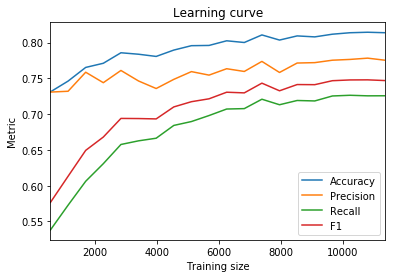

In [44]:
size = np.arange(568, 11721, 568)
plt.title("Learning curve")

plt.plot(size, scores[:, 0], label = 'Accuracy')
plt.plot(size, scores[:, 1], label = 'Precision')
plt.plot(size, scores[:, 2], label = 'Recall')
plt.plot(size, scores[:, 3], label = 'F1')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
#plt.ylim(0, 200)
plt.legend(loc = 'lower right')
plt.show()


Conclusion:
From the learning curve generated by Logistric regression on all airline companies, acurracy score is getting higher when we increase the training data set to 50% of the whole data,however, this won't make much better when we are trying to include more data for training over 50%.
As for the other metrics, it has the same situation that the model for logistic regression is not getting much better when we are trying to include more data for training.

Multinomial Naive Bayes Classification

In [45]:
scores_nb = []
for i in range(586,11721,586):  #increase the size every 5% of the training data set--> every 5% = 586 of 11712 rows
    x_training = x_training_set[:i]
    y_training = y_training_set[:i]
    
    #testing set is always the same 
    #vectorizing the training and testing set

    v = TfidfVectorizer(min_df=0.0005)
    x_train = v.fit_transform(x_training)
    x_testing = v.transform(x_testing_set)
    
    #build up MNB model
    MNB_all = MultinomialNB(1e-10)
    MNB_all.fit(x_train,y_training)
    #generate predicted results
    predict_result = MNB_all.predict(x_testing)
    
    accuracy = accuracy_score(y_testing_set,predict_result)
    precision = precision_score(y_testing_set,predict_result,average=None).mean()
    recall = recall_score(y_testing_set,predict_result,average=None).mean()
    f1 = f1_score(y_testing_set,predict_result,average=None).mean()
    # select avg = none means return the score for each 
    #select class with the average score from each class
    metrics = [accuracy,precision,recall,f1]
    scores_nb.append([metric for metric in metrics])
    #for metric in metrics:
        #scores.append(metric)
    #generate a dataframe for final result 
    



In [46]:
print(np.array(scores_nb))

[[ 0.68647541  0.61584428  0.4844913   0.50766916]
 [ 0.69808743  0.63124886  0.50817516  0.53463033]
 [ 0.70321038  0.65488974  0.51199448  0.54175271]
 [ 0.72131148  0.69271582  0.52865261  0.56260379]
 [ 0.72233607  0.68950008  0.53602704  0.57044364]
 [ 0.72199454  0.67825629  0.53780634  0.57068576]
 [ 0.73872951  0.71805775  0.5552218   0.59276342]
 [ 0.74419399  0.73137904  0.56472493  0.60412017]
 [ 0.74624317  0.72389444  0.57364007  0.61170122]
 [ 0.75034153  0.73395789  0.58362875  0.62358809]
 [ 0.74692623  0.7410219   0.56771994  0.60796146]
 [ 0.75102459  0.74506441  0.57884409  0.61987404]
 [ 0.75717213  0.75568792  0.5872978   0.63012441]
 [ 0.75853825  0.75525212  0.59066293  0.63324274]
 [ 0.76092896  0.75832486  0.59380784  0.63695197]
 [ 0.76161202  0.76320703  0.5935899   0.63704111]
 [ 0.76605191  0.76473375  0.60070475  0.64403388]
 [ 0.76673497  0.77551226  0.59961439  0.64468345]
 [ 0.76946721  0.78202353  0.60340732  0.64939207]
 [ 0.76775956  0.78179422  0.60

Learning Curve for MNB

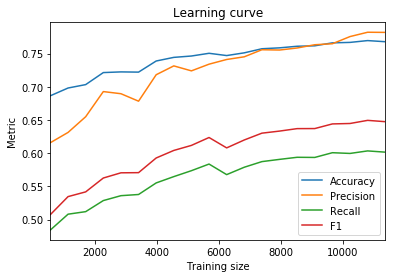

In [47]:
scores_nb = np.array(scores_nb)
size = np.arange(568, 11721, 568)
plt.title("Learning curve")

plt.plot(size, scores_nb[:, 0], label = 'Accuracy')
plt.plot(size, scores_nb[:, 1], label = 'Precision')
plt.plot(size, scores_nb[:, 2], label = 'Recall')
plt.plot(size, scores_nb[:, 3], label = 'F1')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
#plt.ylim(0, 200)
plt.legend(loc = 'lower right')
plt.show()


Conclusion: 
From the learning curve we generate from the Multinomial Naive Bayes classification, as the training data size increases, the accuracy of this model on all airlines' reviews are higher.
As for the other metrics, precision is getting closer to the accuracy score as we have more data for training.Precision implies the ability the classifier not to label a negative result to a positive. In addition, the 'negative class" in the precision here means "the other two classes". The recall rates implies the ability the model to find out the positive sample. When we have more training data set, this model is becoming slightly better to find out the right sample from the data but it doesn't make any big changes when we include almost 75% of the whole data as the training size. This happens to F1 score as well. However, the score for recall and f1 scores are only higher than 0.50 as more training data are included. Therefore, the ability for this Multinomial Naive Bayes classifier is not that good at finding the right class samples since it could roughly find only half of the right class.

## Accuracy of Logistic regression and MNB on the same plot

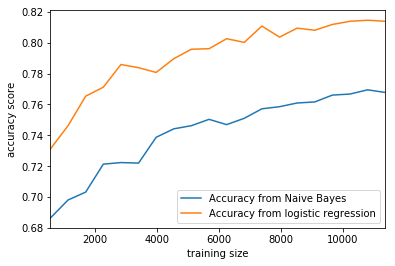

In [48]:
size = np.arange(568, 11721, 568)
plt.plot(size, scores_nb[:, 0], label = 'Accuracy from Naive Bayes')
plt.plot(size, scores[:, 0], label = 'Accuracy from logistic regression')
plt.xlabel('training size')
plt.ylabel('accuracy score')
plt.xlim(size.min(),size.max())
plt.legend(loc='lower right')
plt.show()


In conclusion, in terms of accuracy rate, as the training data size gets larger, both models are making the result better, however, logistic regression has a better performance in terms of accuracy score, which means that they have higher scores of predicting the right reviews based on the tweets given.